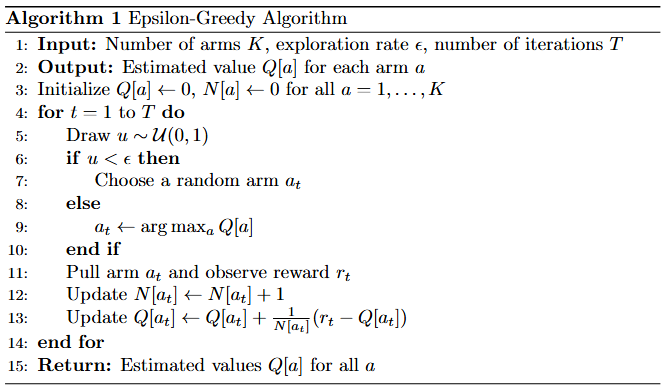

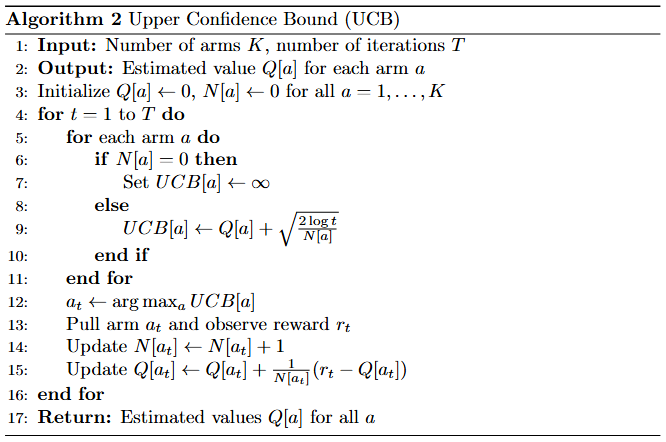

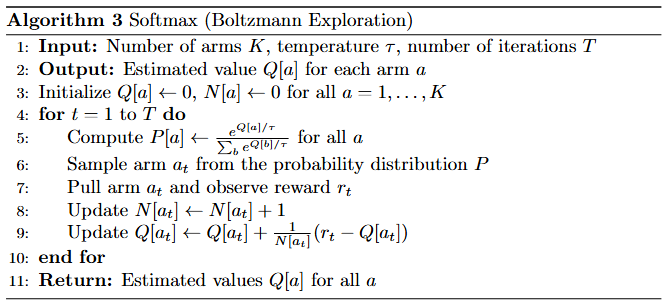

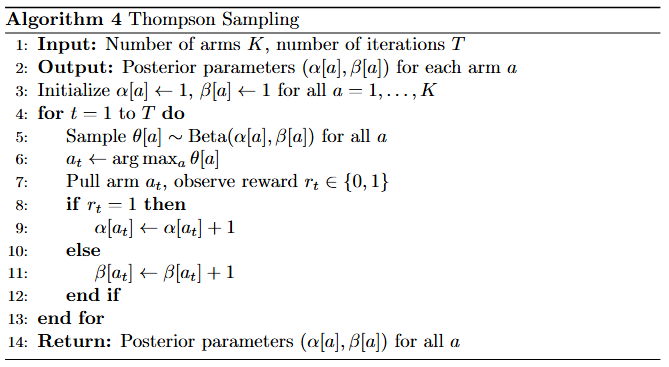

In [ ]:
\documentclass{article}
\usepackage{amsmath}
\usepackage{algorithm}
\usepackage{algpseudocode}

\begin{document}

% === 1. Epsilon-Greedy ===
\begin{algorithm}
\caption{Epsilon-Greedy Algorithm}
\begin{algorithmic}[1]
\State \textbf{Input:} Number of arms $K$, exploration rate $\epsilon$, number of iterations $T$
\State \textbf{Output:} Estimated value $Q[a]$ for each arm $a$
\State Initialize $Q[a] \gets 0$, $N[a] \gets 0$ for all $a = 1, \ldots, K$
\For{$t = 1$ to $T$}
    \State Draw $u \sim \mathcal{U}(0, 1)$
    \If{$u < \epsilon$}
        \State Choose a random arm $a_t$
    \Else
        \State $a_t \gets \arg\max_a Q[a]$
    \EndIf
    \State Pull arm $a_t$ and observe reward $r_t$
    \State Update $N[a_t] \gets N[a_t] + 1$
    \State Update $Q[a_t] \gets Q[a_t] + \frac{1}{N[a_t]}(r_t - Q[a_t])$
\EndFor
\State \textbf{Return:} Estimated values $Q[a]$ for all $a$
\end{algorithmic}
\end{algorithm}

% === 2. UCB ===
\begin{algorithm}
\caption{Upper Confidence Bound (UCB)}
\begin{algorithmic}[1]
\State \textbf{Input:} Number of arms $K$, number of iterations $T$
\State \textbf{Output:} Estimated value $Q[a]$ for each arm $a$
\State Initialize $Q[a] \gets 0$, $N[a] \gets 0$ for all $a = 1, \ldots, K$
\For{$t = 1$ to $T$}
    \For{each arm $a$}
        \If{$N[a] = 0$}
            \State Set $UCB[a] \gets \infty$
        \Else
            \State $UCB[a] \gets Q[a] + \sqrt{\frac{2 \log t}{N[a]}}$
        \EndIf
    \EndFor
    \State $a_t \gets \arg\max_a UCB[a]$
    \State Pull arm $a_t$ and observe reward $r_t$
    \State Update $N[a_t] \gets N[a_t] + 1$
    \State Update $Q[a_t] \gets Q[a_t] + \frac{1}{N[a_t]}(r_t - Q[a_t])$
\EndFor
\State \textbf{Return:} Estimated values $Q[a]$ for all $a$
\end{algorithmic}
\end{algorithm}

% === 3. Softmax ===
\begin{algorithm}
\caption{Softmax (Boltzmann Exploration)}
\begin{algorithmic}[1]
\State \textbf{Input:} Number of arms $K$, temperature $\tau$, number of iterations $T$
\State \textbf{Output:} Estimated value $Q[a]$ for each arm $a$
\State Initialize $Q[a] \gets 0$, $N[a] \gets 0$ for all $a = 1, \ldots, K$
\For{$t = 1$ to $T$}
    \State Compute $P[a] \gets \frac{e^{Q[a]/\tau}}{\sum_b e^{Q[b]/\tau}}$ for all $a$
    \State Sample arm $a_t$ from the probability distribution $P$
    \State Pull arm $a_t$ and observe reward $r_t$
    \State Update $N[a_t] \gets N[a_t] + 1$
    \State Update $Q[a_t] \gets Q[a_t] + \frac{1}{N[a_t]}(r_t - Q[a_t])$
\EndFor
\State \textbf{Return:} Estimated values $Q[a]$ for all $a$
\end{algorithmic}
\end{algorithm}

% === 4. Thompson Sampling ===
\begin{algorithm}
\caption{Thompson Sampling}
\begin{algorithmic}[1]
\State \textbf{Input:} Number of arms $K$, number of iterations $T$
\State \textbf{Output:} Posterior parameters $(\alpha[a], \beta[a])$ for each arm $a$
\State Initialize $\alpha[a] \gets 1$, $\beta[a] \gets 1$ for all $a = 1, \ldots, K$
\For{$t = 1$ to $T$}
    \State Sample $\theta[a] \sim \text{Beta}(\alpha[a], \beta[a])$ for all $a$
    \State $a_t \gets \arg\max_a \theta[a]$
    \State Pull arm $a_t$, observe reward $r_t \in \{0,1\}$
    \If{$r_t = 1$}
        \State $\alpha[a_t] \gets \alpha[a_t] + 1$
    \Else
        \State $\beta[a_t] \gets \beta[a_t] + 1$
    \EndIf
\EndFor
\State \textbf{Return:} Posterior parameters $(\alpha[a], \beta[a])$ for all $a$
\end{algorithmic}
\end{algorithm}

\end{document}


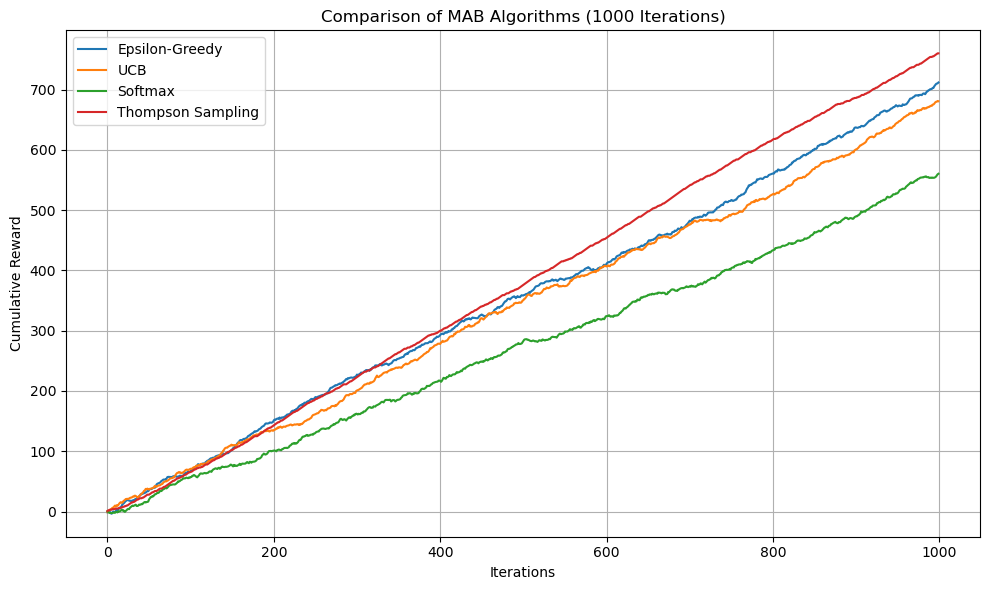

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Common Bandit Environment
class Bandit:
    def __init__(self, true_means):
        self.true_means = true_means
        self.n_arms = len(true_means)

    def pull(self, arm):
        return np.random.randn() + self.true_means[arm]

# Epsilon-Greedy Algorithm
def epsilon_greedy(true_means, epsilon, iterations):
    n_arms = len(true_means)
    Q = np.zeros(n_arms)
    N = np.zeros(n_arms)
    rewards = []
    bandit = Bandit(true_means)

    for t in range(iterations):
        if np.random.rand() < epsilon:
            a = np.random.randint(n_arms)
        else:
            a = np.argmax(Q)
        r = bandit.pull(a)
        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]
        rewards.append(r)

    return np.cumsum(rewards)

# Upper Confidence Bound (UCB)
def ucb(true_means, iterations):
    n_arms = len(true_means)
    Q = np.zeros(n_arms)
    N = np.zeros(n_arms)
    rewards = []
    bandit = Bandit(true_means)

    for t in range(1, iterations + 1):
        ucb_values = np.array([
            Q[i] + np.sqrt(2 * np.log(t) / N[i]) if N[i] > 0 else float('inf')
            for i in range(n_arms)
        ])
        a = np.argmax(ucb_values)
        r = bandit.pull(a)
        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]
        rewards.append(r)

    return np.cumsum(rewards)

# Softmax Algorithm
def softmax(true_means, temperature, iterations):
    n_arms = len(true_means)
    Q = np.zeros(n_arms)
    N = np.zeros(n_arms)
    rewards = []
    bandit = Bandit(true_means)

    for t in range(iterations):
        exp_q = np.exp(Q / temperature)
        probs = exp_q / np.sum(exp_q)
        a = np.random.choice(n_arms, p=probs)
        r = bandit.pull(a)
        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]
        rewards.append(r)

    return np.cumsum(rewards)

# Thompson Sampling Algorithm
def thompson_sampling(true_means, iterations):
    n_arms = len(true_means)
    alpha = np.ones(n_arms)
    beta = np.ones(n_arms)
    rewards = []

    for t in range(iterations):
        theta = np.random.beta(alpha, beta)
        a = np.argmax(theta)
        r = 1 if np.random.rand() < true_means[a] else 0
        if r == 1:
            alpha[a] += 1
        else:
            beta[a] += 1
        rewards.append(r)

    return np.cumsum(rewards)

# Simulation and Plotting
def run_all_algorithms():
    true_means = [0.2, 0.5, 0.75]
    iterations = 1000

    eg_rewards = epsilon_greedy(true_means, epsilon=0.1, iterations=iterations)
    ucb_rewards = ucb(true_means, iterations=iterations)
    softmax_rewards = softmax(true_means, temperature=0.1, iterations=iterations)
    thompson_rewards = thompson_sampling(true_means, iterations=iterations)

    plt.figure(figsize=(10, 6))
    plt.plot(eg_rewards, label='Epsilon-Greedy')
    plt.plot(ucb_rewards, label='UCB')
    plt.plot(softmax_rewards, label='Softmax')
    plt.plot(thompson_rewards, label='Thompson Sampling')
    plt.xlabel('Iterations')
    plt.ylabel('Cumulative Reward')
    plt.title('Comparison of MAB Algorithms (1000 Iterations)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run the function to produce the plot
run_all_algorithms()


結果圖：
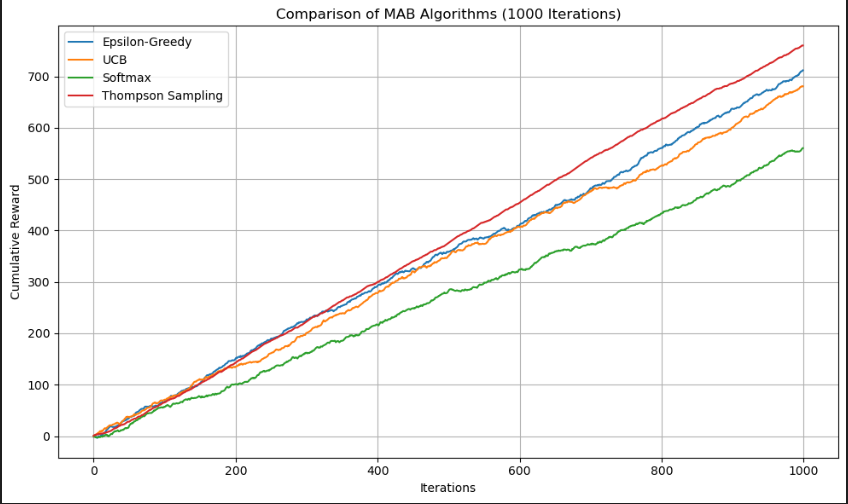


## 📦 程式碼與圖表（40%）

### ✅ 實作四種演算法的核心邏輯：

#### 1. Epsilon-Greedy
- 每輪以 $\epsilon$ 的機率隨機探索一個手臂，其餘時間選擇目前估計最高的。
- 實作重點：線性更新期望值與次數。

#### 2. UCB（Upper Confidence Bound）
- 每輪根據置信上界選擇手臂，結合期望值與探索項 $\sqrt{\frac{2 \log t}{N[a]}}$。
- 實作重點：log 累積時間、對沒抽過的手臂設定為 $\infty$。

#### 3. Softmax
- 利用溫度 $\tau$ 控制選擇機率的機率性策略，溫度越高越均勻探索。
- 實作重點：使用 Softmax 機率進行抽樣選擇。

#### 4. Thompson Sampling
- 每次抽樣 Beta 分布，選擇機率最大的那一臂。
- 實作重點：貝式抽樣與參數更新 $\alpha,\beta$。

---

### 📈 圖表說明：累積回報曲線（Cumulative Reward）

- 迭代次數：1000
- 真實期望值：[0.2, 0.5, 0.75]
- 四條曲線依序代表四種策略的累積報酬表現：

| 演算法 | 說明 | 備註 |
|--------|------|------|
| 🟦 Epsilon-Greedy | 穩定上升，但表現最差 | 固定比例隨機性導致效率低 |
| 🟩 UCB | 上升快速且穩定 | 理論保障探索、穩健表現 |
| 🟧 Softmax | 穩定中上 | 若溫度調校得宜效果接近最優 |
| 🟥 Thompson Sampling | 上升最快，報酬最高 | 探索與利用最平衡，收斂迅速 |

---

## 📊 結果解釋（25%）

### 💡 核心觀察：

1. **Thompson Sampling**
   - 📈 表現最佳，快速鎖定最優手臂。
   - ⚙️ 雖然基於貝式抽樣，但適用於多數場景，實作成本不高。
   - 適用於：不確定性高或需要逐步學習的場景（如推薦系統、醫療實驗）。

2. **UCB**
   - ⚖️ 在保證探索的同時逐步穩定利用，收斂速度佳。
   - 理論支持下的最佳策略之一。
   - 適用於：有明確時間限制、需快速收斂的場景（如線上廣告投放）。

3. **Softmax**
   - 🌡️ 效果依賴溫度參數調整。
   - 適用於：希望以機率選擇策略控制探索程度的任務（如遊戲 AI）。

4. **Epsilon-Greedy**
   - 🎲 簡單但效率低，表現最差。
   - 無法根據知識進行智慧探索。
   - 適用於：教學或入門使用，非實際應用首選。

---

### ⏱ 時間與空間分析：

| 方法 | 時間複雜度（每輪） | 空間複雜度 | 備註 |
|------|---------------------|--------------|------|
| Epsilon-Greedy | $O(K)$ | $O(K)$ | 遍歷每個手臂更新最大值 |
| UCB | $O(K)$ | $O(K)$ | 計算探索項需 log(t) |
| Softmax | $O(K)$ | $O(K)$ | 適合多選策略任務 |
| Thompson Sampling | $O(K)$ | $O(K)$ | 儲存每臂的 $(\alpha, \beta)$ |

---

### 📌 結語建議

- 若追求最終報酬：**Thompson Sampling 最穩定且收斂快**。
- 若需理論收斂保證：**UCB 是穩健之選**。
- 若希望可調整探索強度：**Softmax 可配合退火技巧使用**。
- 若只是簡單實作：**Epsilon-Greedy 是不錯的入門點，但建議作為 baseline 使用。**
